# Analisis Exploratorio Datos Properati

In [6]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (15, 5)

prop = pd.read_csv('datos.csv', low_memory=False)

#prop = pd.read_csv('Propiedades-0701.csv', low_memory=False)

In [7]:
#vemos la forma en que se muestran los datos
prop.tail()

,Unnamed: 0,created_on,description,expenses,extra,floor,geonames_id,id,lat-lon,place_name,place_with_parent_names,price_aprox_usd,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,title
686479,1628935,2017-01-22,Corredor Responsable: Ariel Champanier - CUCIC...,NaN,NaN,NaN,3430570.0,4fe9193de1ae5a40e263c068456cb241929b7562,"-34.60952,-58.3805",Monserrat,|Argentina|Capital Federal|Monserrat|,0.0,NaN,http://www.properati.com.ar/1517b_venta_local_...,store,NaN,Capital Federal,NaN,NaN,LOCAL 242 MTS SOBRE AVDA 9 DE JULIO
686480,1628941,2017-01-22,Corredor Responsable: Martin Manias - CMCLZ 40...,NaN,NaN,NaN,3433762.0,aa95c18fd185533ed8013b62fe3079d811fcde14,"-34.889363,-58.381948",Glew,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,90000.0,71355.15,http://www.properati.com.ar/1517j_venta_local_...,store,NaN,Bs.As. G.B.A. Zona Sur,20.0,1.261296,LOCAL EN LA ZONA CENTRICA DE GLEW
686481,1629166,2017-01-14,"Venta - Local - Argentina, Buenos Aires, Pilar...",NaN,NaN,NaN,NaN,b02c9ec630618708cd5881c61c4d72a929e5b328,"-34.4112684,-58.8487325",Bermudas Country Club,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Berm...,250000.0,NaN,http://www.properati.com.ar/14vs6_venta_local_...,store,1.0,Bs.As. G.B.A. Zona Norte,NaN,NaN,Local en Venta ubicado en Pilar
686482,1629226,2017-01-04,"Edificado sobre un lote de 8 x 35,40 metros.Fr...",NaN,NaN,NaN,6693230.0,f192f4bc806b0bdad03f60c611ca54aad4595b51,"-34.6120493842,-58.4810373166",Villa Santa Rita,|Argentina|Capital Federal|Villa Santa Rita|,540000.0,NaN,http://www.properati.com.ar/14p8e_venta_local_...,store,NaN,Capital Federal,NaN,NaN,LOCAL EN VENTA
686483,1629627,2017-01-13,PH 4/5 Amb Sobre Av. Maip? Ideal Para Refaccio...,NaN,NaN,NaN,3427504.0,19347df2269c8bbdaecd8d26e122c3c716ec8e56,"-34.5316651,-58.4794541",Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,0.0,0.00,http://www.properati.com.ar/14v2i_venta_local_...,store,NaN,Bs.As. G.B.A. Zona Norte,86.0,239.000000,PH 4/5 Amb Sobre Av. Maip? Ideal Para Refaccio...


In [8]:
#los tipos de datos de cada columna
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686484 entries, 0 to 686483
Data columns (total 20 columns):
Unnamed: 0                 686484 non-null int64
created_on                 686484 non-null object
description                390777 non-null object
expenses                   33438 non-null object
extra                      224871 non-null object
floor                      148419 non-null float64
geonames_id                559694 non-null float64
id                         165913 non-null object
lat-lon                    511707 non-null object
place_name                 686407 non-null object
place_with_parent_names    686484 non-null object
price_aprox_usd            686484 non-null float64
price_usd_per_m2           535723 non-null float64
properati_url              686484 non-null object
property_type              686484 non-null object
rooms                      404253 non-null float64
state_name                 165913 non-null object
surface_covered_in_m2      147193 no

# ¿cuales son los barrios mas costosos de cada zona?

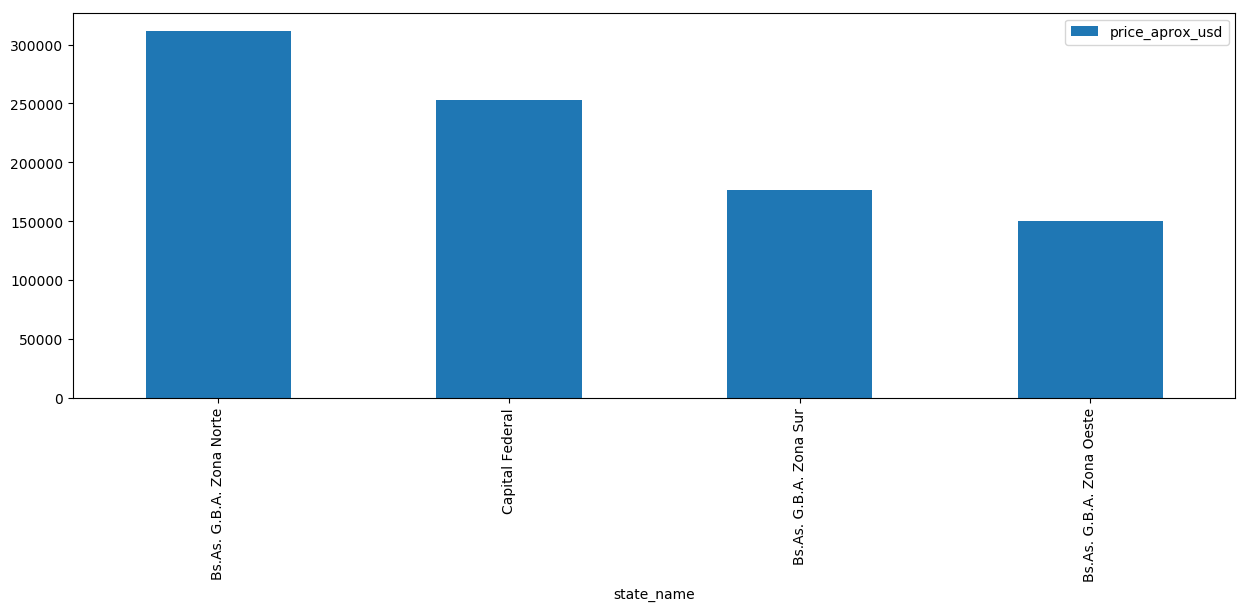

In [9]:
#¿cual es la zona mas costosa en promedio?
zonas = prop[['state_name','price_aprox_usd']].groupby('state_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False).plot(kind='bar')
zonas

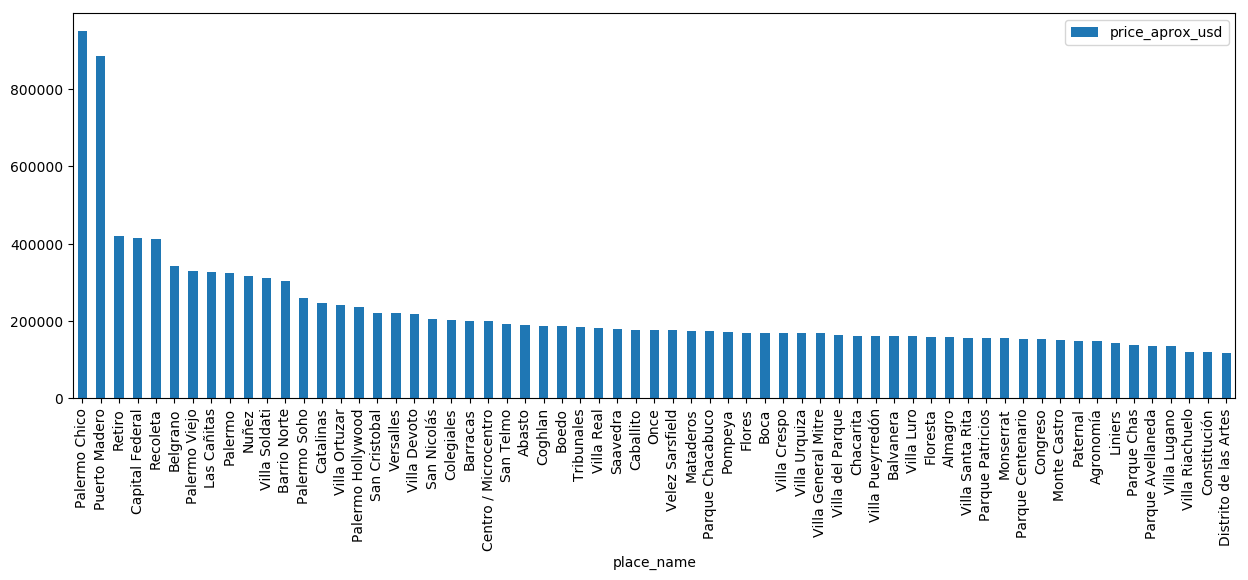

In [10]:
#¿barrios mas costosos Capital Federal?
capital = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_cap = capital[['state_name','place_name','price_aprox_usd']][capital['state_name']=="Capital Federal"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).plot(kind='bar')
top_mayor_prom_pre_cap

In [11]:
#lo que es observa es que desde la zona de retiro hacia el noreste los barios mas cercanos al rio tienden a estar entre
#los mas costosos de Capital Federal

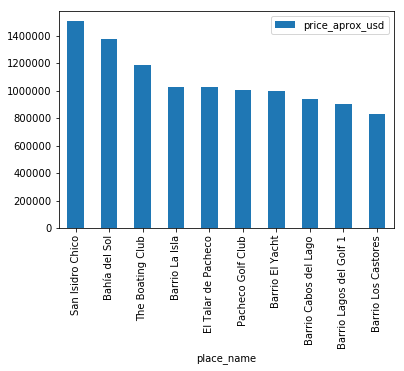

In [209]:
#¿barrios mas costosos zona norte?
zonanorte = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_nor = zonanorte[['state_name','place_name','price_aprox_usd']][zonanorte['state_name']=="Bs.As. G.B.A. Zona Norte"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).head(10).plot(kind='bar')
top_mayor_prom_pre_nor

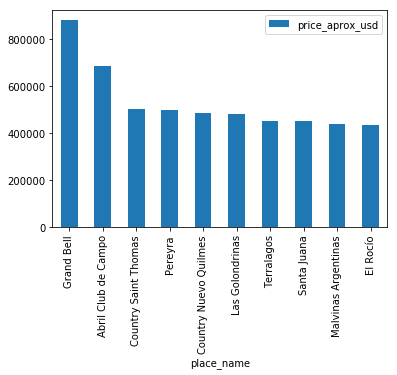

In [214]:
#¿barrios mas costosos zona sur?
zonasur = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_sur = zonasur[['state_name','place_name','price_aprox_usd']][zonasur['state_name']=="Bs.As. G.B.A. Zona Sur"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False).head(10).plot(kind='bar')
top_mayor_prom_pre_sur

In [14]:
#¿barrios mas costosos zona oeste?
zonaoeste = prop.dropna(subset=['price_aprox_usd'])
top_mayor_prom_pre_oes = zonaoeste[['state_name','place_name','price_aprox_usd']][zonaoeste['state_name']=="Bs.As. G.B.A. Zona Oeste"]\
.groupby('place_name').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
top_mayor_prom_pre_oes

,price_aprox_usd
place_name,
Cruce Castelar,795000.000000
El Casco de Leloir,589285.714286
Terravista Barrio Privado,552333.333333
Campos de Álvarez,533780.487805
San Diego Country Club,463000.000000
Barrio Privado Altos del Sol,425730.769231
Barrio cerrado Santa Ana,424166.666667
"Barrio Cerrado ""El Casco de Moreno""",379000.000000
Los Pingüinos Country Club,375000.000000


In [15]:
#observamos que los barrios con mayor cercania al rio, o los barrios privados tiendenn a ser los mas costosos de cada 
#zona 

# analizando datos de departamentos

In [146]:
#hay alguna relacion entre el precio y la cantidad de departamentos por area cubierta en capital federal
x=prop['state_name']=="Capital Federal"
y=prop['property_type']=="apartment"
z=prop['surface_covered_in_m2']<80.000000
relacion_cantidad_departamentos_con_precio_zona_en_capital=top_con_mayor_promedio_precio_GB=\
prop[['state_name','place_name','price_aprox_usd','property_type']][ x& y].groupby('place_name').\
agg({'price_aprox_usd':'mean','place_name':'count'}).sort_values( by='price_aprox_usd' ,ascending=False)

relacion_cantidad_departamentos_con_precio_zona_en_capital.rename(columns={'place_name': 'Cantidad De Departamentos'}, inplace=True)

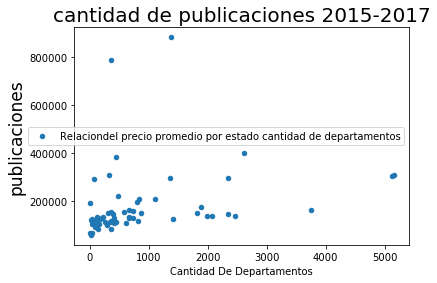

In [150]:
fig = plt.figure(figsize=(15,9));

relacion_cantidad_departamentos_con_precio_zona_en_capital\
.plot.scatter(x='Cantidad De Departamentos',y='price_aprox_usd',label='Relaciondel precio promedio por estado cantidad de departamentos')



plt.title('cantidad de publicaciones 2015-2017', fontsize=20);
plt.ylabel('publicaciones', fontsize=17);
#plt.xlabel('año', fontsize=17);




In [18]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de capital
edif = prop.dropna(subset=['floor'])
capital = edif['state_name']=="Capital Federal"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)
res


,price_aprox_usd
place_name,
Palermo Chico,648650.000000
Puerto Madero,555238.000000
Las Cañitas,314731.707317
Recoleta,300994.014128
Belgrano,254700.749103
Retiro,240307.865169
Palermo,229177.103542
Nuñez,224156.564667
Barrio Norte,219154.998591


In [19]:
#de los departamentos de que se encuentran entre el piso 15 y 100 de su edificio
#de estos los barrios mas costosos de zona norte
edif = prop.dropna(subset=['floor'])
capital = edif['state_name']=="Bs.As. G.B.A. Zona Norte"
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&capital&menos100&mas15][['place_name','price_aprox_usd','floor','state_name']]
res=res.groupby('place_name').agg({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending = 0).head(10)
res


,price_aprox_usd
place_name,
Barrio El Golf,365000.000000
La Lucila,336830.238095
Pilar Golf Country Club,320000.000000
Vicente López,300204.061151
Florida,296998.076923
Acassuso,292319.608828
Olivos,288239.165289
Martínez,253399.754762
Barrio Los Castores,249000.000000


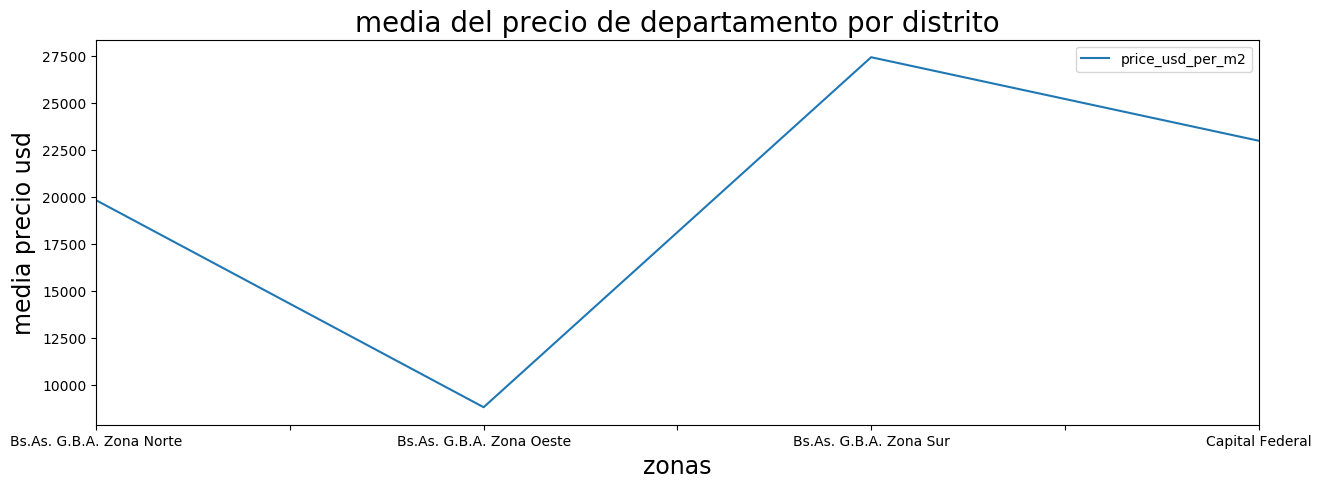

In [20]:
#comparacion de precios de departamentos por distrito
edif = prop.dropna(subset=['floor'])
departamento = edif['property_type'] == "apartment"
menos100=edif['floor'] < 100
mas15=edif['floor'] > 0
res=edif[departamento&menos100&mas15][['place_name','price_usd_per_m2','floor','state_name']]
res.groupby('state_name').agg({'price_usd_per_m2':'mean'}).plot()
plt.title('media del precio de departamento por distrito', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);


In [21]:
#en el grafico podemos observar que los distritos de capital y zona norte son los que poseen
#los departamentos mas costosos con medias de mas 2000usd/m2

In [176]:
#comparacion de precios de departamentos por distrito
edif = prop.dropna(subset=['rooms'])
edif = edif.dropna(subset=['price_usd_per_m2'])
departamento = edif['property_type'] == "apartment"
capital = edif['state_name'] == "Capital Federal"
#barrio = edif['place_name'] == 'Retiro'
menos100=edif['floor'] < 20
mas15=edif['floor'] > 0
a = edif.surface_covered_in_m2 < 120
b = edif.surface_covered_in_m2 > 50
c = edif.price_usd_per_m2 > 0
edif = edif[departamento&capital&menos100&mas15]
#res=edif[departamento&menos100&mas15&a&b&c][['place_name','price_usd_per_m2','floor','state_name']]
#z=res.groupby('floor').agg({'price_usd_per_m2':'mean'}).plot(kind = 'bar',color='green' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)

edif.plot.(kind = 'bar',x='floor',y='price_usd_per_m2',label='Relaciondel precio promedio por estado cantidad de departamentos')


SyntaxError: invalid syntax (<ipython-input-176-6fe79d8889ec>, line 16)

# comparacion de precios en las distintas zonas del conurbano y capital
# respecto de los diferentes tipos de propiedades


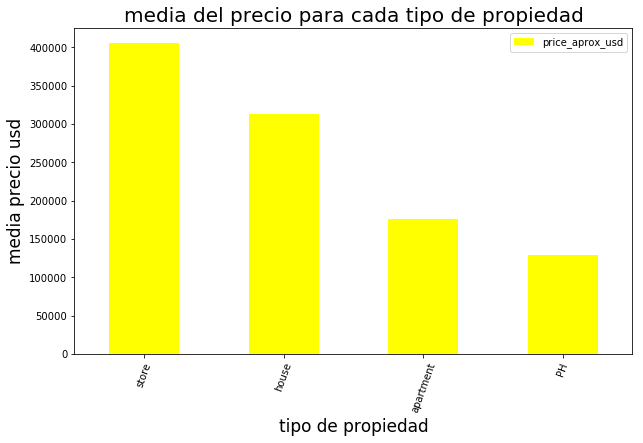

In [175]:
# para todos las zonas cuales propiedades son mas costosas de media
propiedades = prop[['state_name','place_name','price_aprox_usd','property_type']]\
.groupby('property_type').agg({'price_aprox_usd':'mean'})\
.sort_values(by='price_aprox_usd',ascending=False)
propiedades.plot(kind='bar', rot=70, figsize=(10,6), color='yellow', fontsize=10, grid=False);
plt.title('media del precio para cada tipo de propiedad', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('tipo de propiedad', fontsize=17);

In [24]:
#en este grafico podemos observar la cantidad de propiedades de cada tipo que nos cedio properati

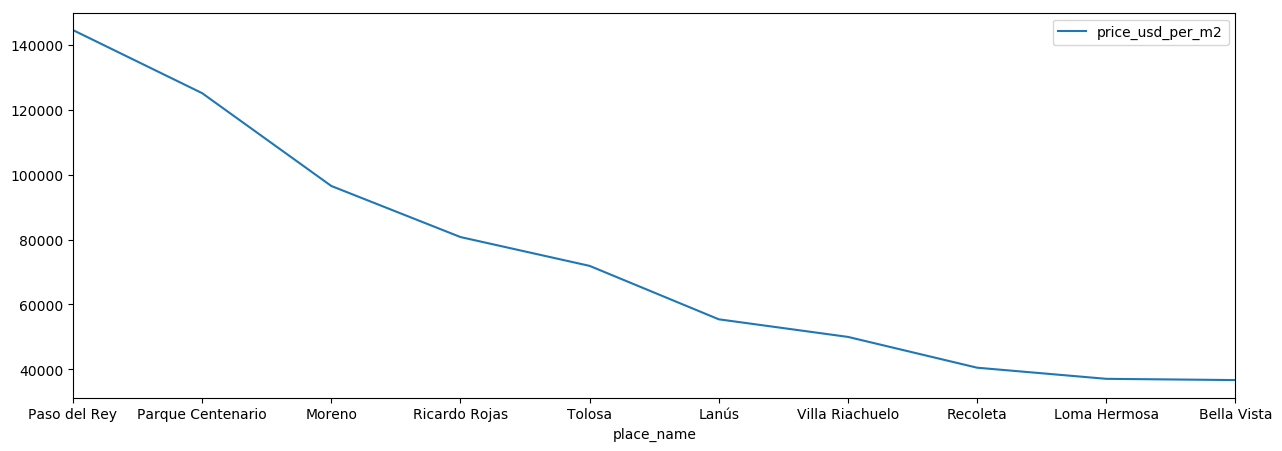

In [25]:
#los lugares con los ph mas costosos por m2
esPH=prop['property_type']=="PH"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('place_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).head(10).plot()

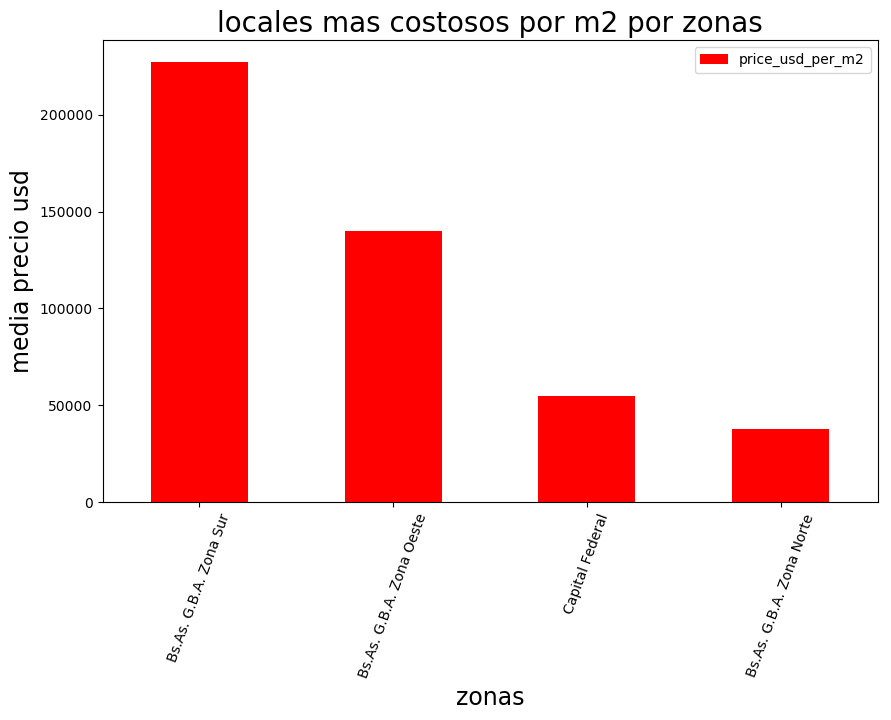

In [26]:
#los lugares con las casas mas costosas por m2
esPH=prop['property_type']=="store"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('locales mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [27]:
#podemos observar que los locales mas costosos se encuentran en capital federal y que en los otros
#tres distritos los precios son bastantes parecidos

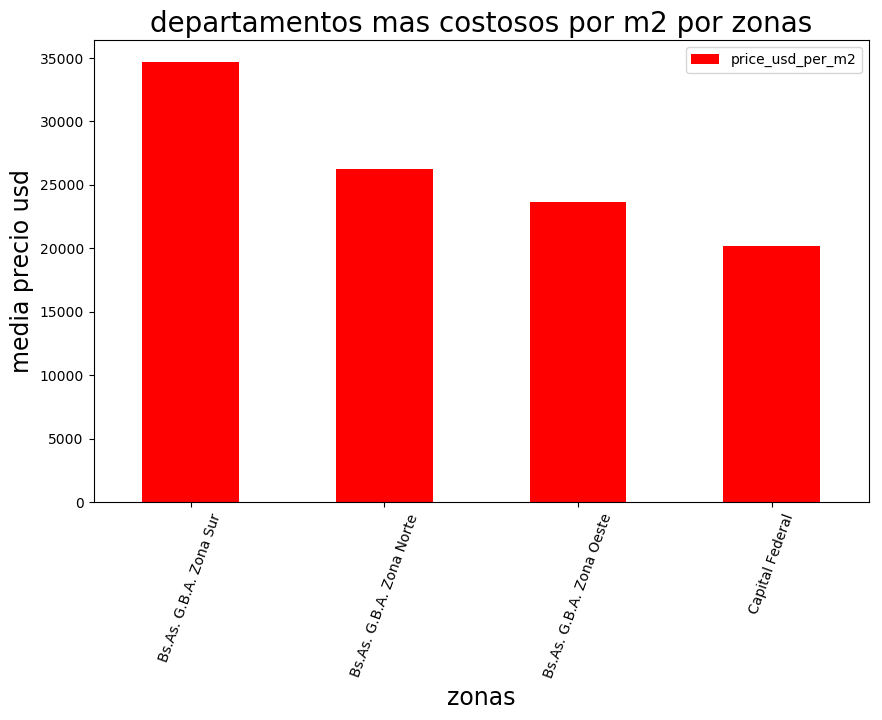

In [28]:
#los lugares con los departamentos mas costosas por m2
esPH=prop['property_type']=="apartment"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('departamentos mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [29]:
#nuevamente observamos que capital posee los departamentos mas costosos as como zona sur y oeste posee precios similares

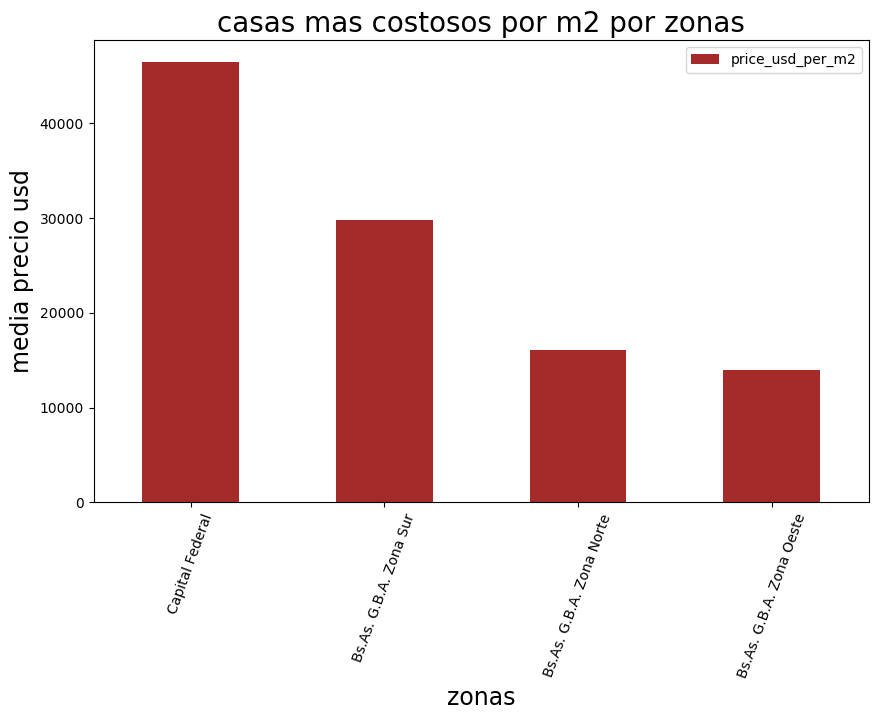

In [30]:
#los lugarares con las casas mas costosas por m2
esPH=prop['property_type']=="house"

esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='brown', fontsize=10, grid=False);
plt.title('casas mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [31]:
#respecto al precio de las casas capital tambien lleva una ventaja apreciable respecto a los demas distritos

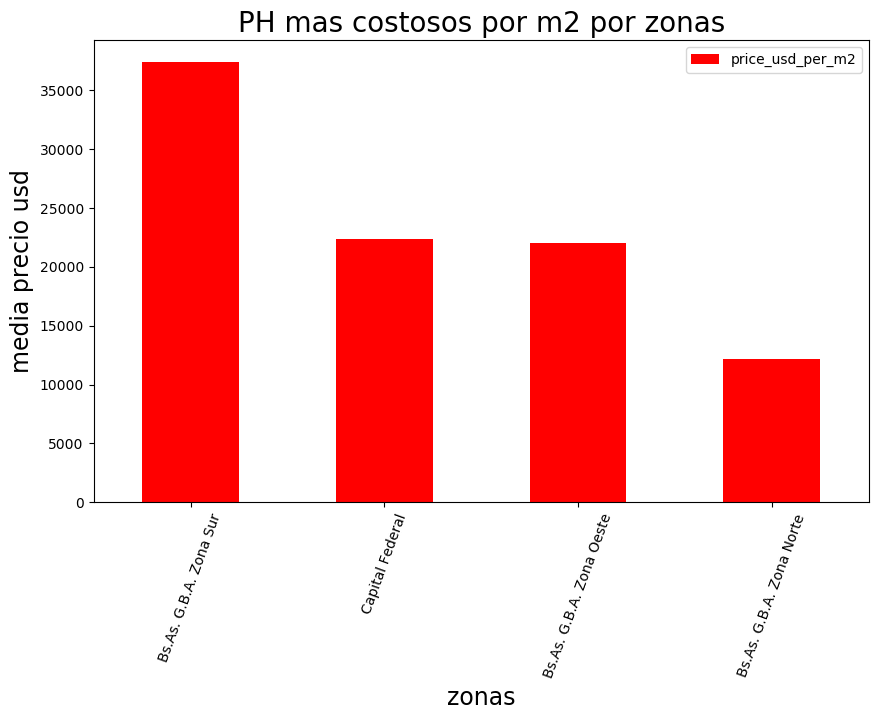

In [32]:
#los lugarares con los PH mas costosas por m2
esPH=prop['property_type']=="PH"
esBS= prop['place_name']=="Capital Federal"
ph = prop.loc[esPH & ~esBS]
ph.groupby('state_name').agg({'price_usd_per_m2':'mean'})\
.sort_values(by='price_usd_per_m2',ascending=False).plot(kind='bar', rot=70, figsize=(10,6), color='red', fontsize=10, grid=False);
plt.title('PH mas costosos por m2 por zonas', fontsize=20);
plt.ylabel('media precio usd', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [33]:
#es este caso podemos observar que los precios mas elevados son en capital y que en zona norte y oeste los precios 
#son similares

# como afecta el precio caracteristicas nombradas en la descripcion



In [79]:
# ¿en una misma zona en este caso benavidez como cambia el precio si la casa posee pileta?
prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})



,price_aprox_usd
place_name,
San Isidro,314077.050617


In [35]:
prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_sin_pileta = a[~b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_sin_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
San Isidro,273572.591812


In [36]:
#podemos observar en el barrio de san isidro como el precio pomedio de las propiedades aumento 
# 40000usd cuando la casa tiene pileta

In [78]:
#mismo analisis anterior pero en el barrio de benavidez
prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
Benavidez,271975.655431


In [77]:
#propiedades sin pileta benavidez
prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[~b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]

casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})

,price_aprox_usd
place_name,
Benavidez,265283.673469


In [200]:
## ver precio casas sin pileta y con pileta

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'Benavidez'
e = a.surface_covered_in_m2<170
f = a.surface_covered_in_m2>70
casas_sin_pileta = a[~b & c &e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta = a[b & c&e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_piletas = casas_pileta[casas_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_nopil = casas_sin_pileta[casas_sin_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["pileta"] = promedio_piletas
    info_zona["sin pileta"] = promedio_nopil
    data_zona.append(info_zona)




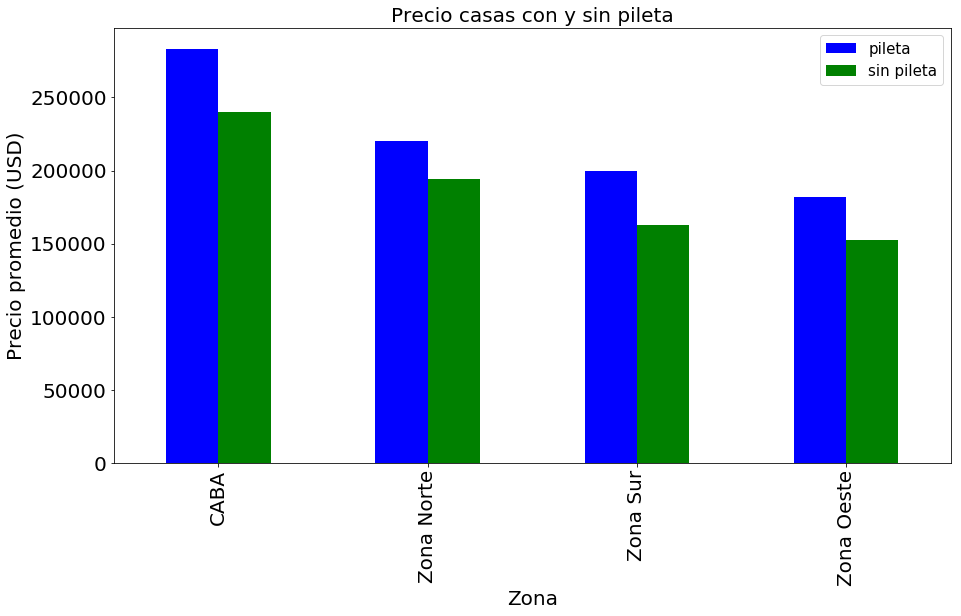

In [104]:
esquinas = pd.DataFrame(data_zona)
#esquinas
esquinas = pd.DataFrame(data_esquinas_zona)
esquinas["Zona"] = esquinas["Zona"].str.replace("Capital Federal","CABA")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
esquinas.index = esquinas.Zona

ax = esquinas.plot(kind = "bar", color =["b","g"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas con y sin pileta', fontsize = 20)
ax.legend(fontsize = 15)



In [39]:
#notamos que en benavidez la diferencia de precio de casas con y sin pileta 
#es menor que en san isidro 

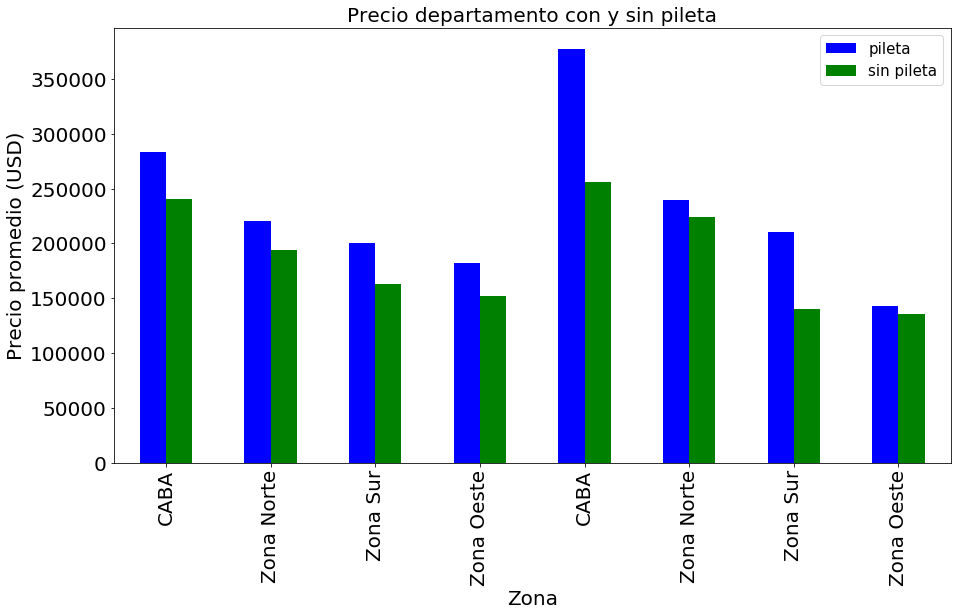

In [137]:
## ver precio departamento sin pileta y con pileta

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("chalet")
c = a.property_type == 'house'

e = a.surface_total_in_m2<200
f = a.surface_total_in_m2>60
casas_sin_pileta = a[~b & c &e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta = a[b & c&e&f]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_esquinas_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_esquinas = casas_pileta[casas_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_entre_esquinas = casas_sin_pileta[casas_sin_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["chalet"] = promedio_esquinas
    info_zona["casa"] = promedio_entre_esquinas
    data_esquinas_zona.append(info_zona)


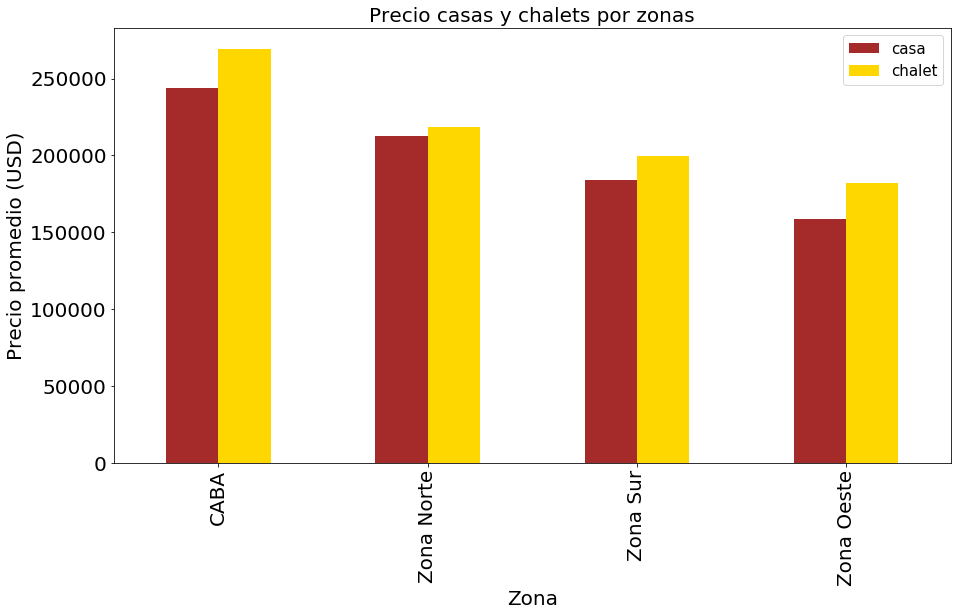

In [186]:
esquinas = pd.DataFrame(data_esquinas_zona)
#esquinas
esquinas = pd.DataFrame(data_esquinas_zona)
esquinas["Zona"] = esquinas["Zona"].str.replace("Capital Federal","CABA")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
esquinas.index = esquinas.Zona

ax = esquinas.plot(kind = "bar", color =["brown","gold"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas y chalets por zonas', fontsize = 20)
ax.legend(fontsize = 15)


In [197]:
## ver precio can y sin patio

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("patio")
c = a.property_type == 'house'

e = a.surface_total_in_m2
f = a.surface_covered_in_m2
#f = a.surface_total_in_m2>60
casas_sin_pileta = a[ c &e&f & (e-f) == 0]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta = a[ c&e&(e-f) != 0]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_esquinas_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_esquinas = casas_pileta[casas_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_entre_esquinas = casas_sin_pileta[casas_sin_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["patio"] = promedio_esquinas
    info_zona["sin patio"] = promedio_entre_esquinas
    data_esquinas_zona.append(info_zona)


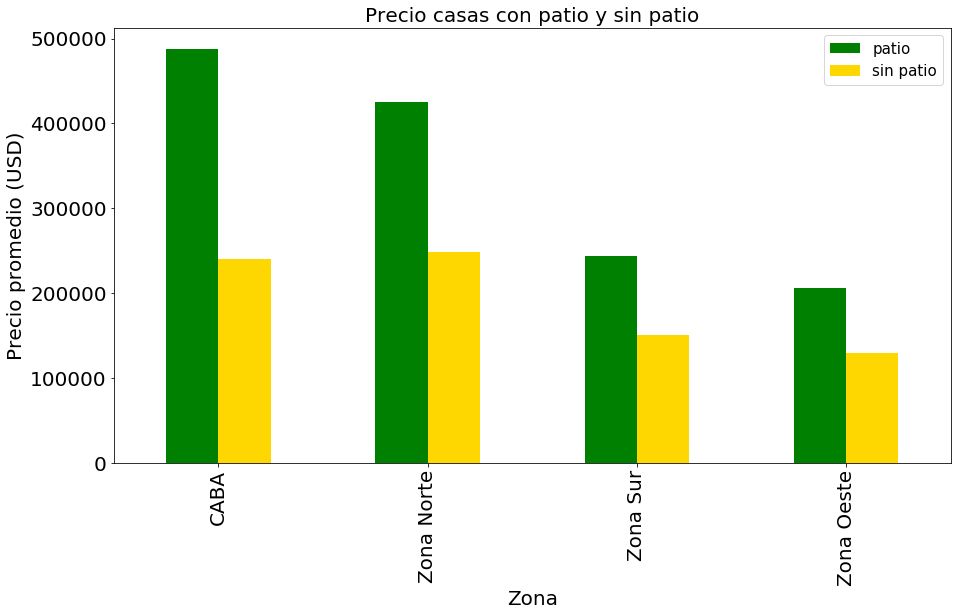

In [199]:
esquinas = pd.DataFrame(data_esquinas_zona)
#esquinas
esquinas = pd.DataFrame(data_esquinas_zona)
esquinas["Zona"] = esquinas["Zona"].str.replace("Capital Federal","CABA")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
esquinas.index = esquinas.Zona

ax = esquinas.plot(kind = "bar", color =["green","gold"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas con patio y sin patio', fontsize = 20)
ax.legend(fontsize = 15)


In [210]:
## ver precio can y sin patio

prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("patio")
c = a.property_type == 'house'

e = a.surface_total_in_m2
f = a.surface_covered_in_m2
#f = a.surface_total_in_m2>60
casas_sin_pileta = a[ c &e&f & (e-f) == 0]#[['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta = a[ c&e&(e-f) != 0]#[['price_aprox_usd','place_name','surface_covered_in_m2']]

data_esquinas_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_esquinas = casas_pileta[casas_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_entre_esquinas = casas_sin_pileta[casas_sin_pileta["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["Zona"] = zona
    info_zona["patio"] = promedio_esquinas
    info_zona["sin patio"] = promedio_entre_esquinas
    data_esquinas_zona.append(info_zona)

In [ ]:
esquinas = pd.DataFrame(data_esquinas_zona)
#esquinas
esquinas = pd.DataFrame(data_esquinas_zona)
esquinas["Zona"] = esquinas["Zona"].str.replace("Capital Federal","CABA")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Norte","Zona Norte")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Sur","Zona Sur")
esquinas["Zona"] = esquinas["Zona"].str.replace("Bs.As. G.B.A. Zona Oeste","Zona Oeste")
esquinas.index = esquinas.Zona

ax = esquinas.plot(kind = "bar", color =["green","gold"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio casas con patio y sin patio', fontsize = 20)
ax.legend(fontsize = 15)


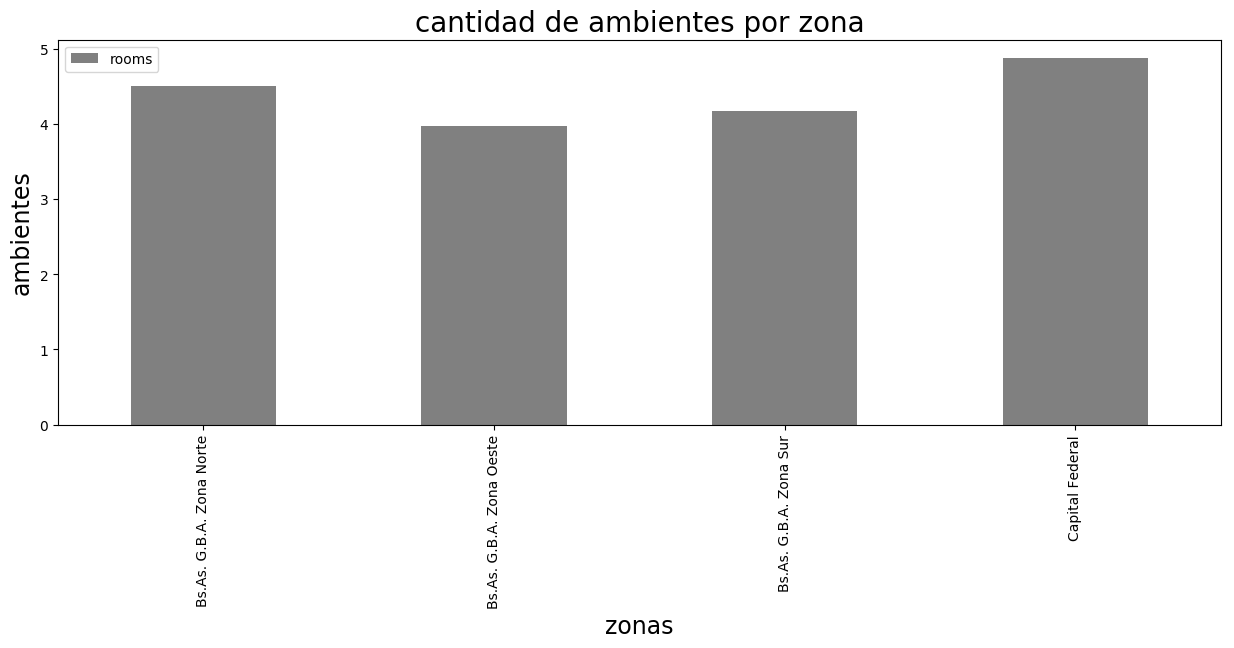

In [40]:
#¿que zona posee la media de mayor cantidad de ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"

res=edif[casa][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('state_name').agg({'rooms':'mean'}).plot(kind = 'bar',color='grey' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)
plt.title('cantidad de ambientes por zona', fontsize=20);
plt.ylabel('ambientes', fontsize=17);
plt.xlabel('zonas', fontsize=17);

In [41]:
#la media de ambientes por zona es de entre 4 y 5 ambientes

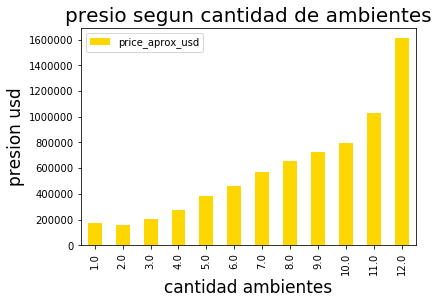

In [171]:
#¿precio por cantidad ambientes?

edif = prop.dropna(subset=['price_usd_per_m2'])
edif = prop.dropna(subset=['rooms'])
#departamento = edif['property_type'] == "apartment"
casa = edif['property_type'] == "house"
ambientes = edif['rooms'] < 13
noambientes0 = edif['rooms'] > 0
res=edif[noambientes0 & casa & ambientes][['place_name','price_aprox_usd','floor','state_name','rooms']]
res.groupby('rooms').agg({'price_aprox_usd':'mean'}).plot(kind = 'bar',color='gold' )#.sort_values(by='price_aprox_usd_per_m2',ascending = 0)
plt.title('presio segun cantidad de ambientes', fontsize=20);
plt.ylabel('presion usd', fontsize=17);
plt.xlabel('cantidad ambientes', fontsize=17);

In [43]:
#a medida que aumentan la cantidad de ambientes tambien aumenta el precio de la propiedad

In [44]:
prop_fecha=prop['created_on'].str.split(' ',3,expand=True) 
a=prop_fecha[0].str.split('-',3,expand=True)
 
prop['year']=a[0]
prop['month']=a[1]
prop['day']=a[2]
prop =prop

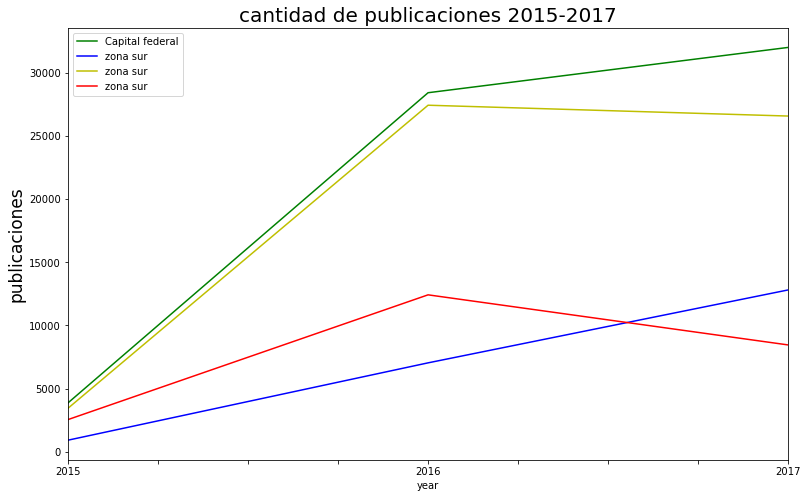

In [45]:
#cantidad de publicaciones de ventas,durante el 2015 a 2017
%matplotlib inline

fig = plt.figure(figsize=(10,6));

ax = fig.add_axes([0,0,1,1]);
#prop.groupby('year').count()['created_on'].plot.line(c='b',label="buenos aires y alrededores")

 #cantidad de publicaciones de ventas,durante el 2012 a 2017 solo en Capital federal
 
capital = prop['state_name']=="Capital Federal"
prop[capital].groupby('year').count()['created_on'].plot.line(c='g', label="Capital federal") 

sur = prop['state_name']=='Bs.As. G.B.A. Zona Sur'
prop[sur].groupby('year').count()['created_on'].plot.line(c='b', label="zona sur") 

norte = prop['state_name']=='Bs.As. G.B.A. Zona Norte'
prop[norte].groupby('year').count()['created_on'].plot.line(c='y', label="zona sur") 

oeste = prop['state_name']=='Bs.As. G.B.A. Zona Oeste'
prop[oeste].groupby('year').count()['created_on'].plot.line(c='r', label="zona sur") 

plt.title('cantidad de publicaciones 2015-2017', fontsize=20);
plt.ylabel('publicaciones', fontsize=17);
#plt.xlabel('año', fontsize=17);

ax.legend();


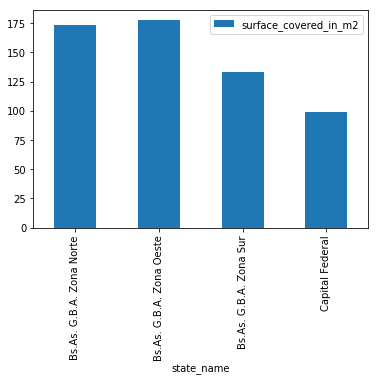

In [182]:
#cantidad de superficie cubierta de la empresa properati en capital federal,Bs.As. G.B.A. Zona Norte,Bs.As. G.B.A. Zona Oeste
 
prop[['surface_covered_in_m2','state_name']].groupby('state_name').agg({'surface_covered_in_m2':'mean'}).plot(kind='bar')


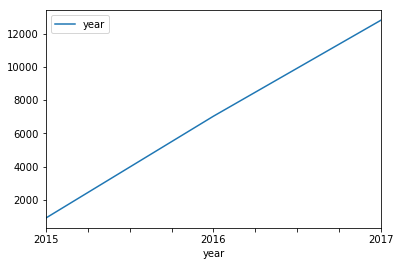

In [47]:
#cantidad de publicaciones de ventas,durante el 2015 a 2017 solo en "Bs.As. G.B.A. Zona Sur"
gbazs=prop['state_name']=="Bs.As. G.B.A. Zona Sur"
 
c=prop[['year','state_name']][gbazs].groupby('year').agg({'year':'count'})
c.plot()

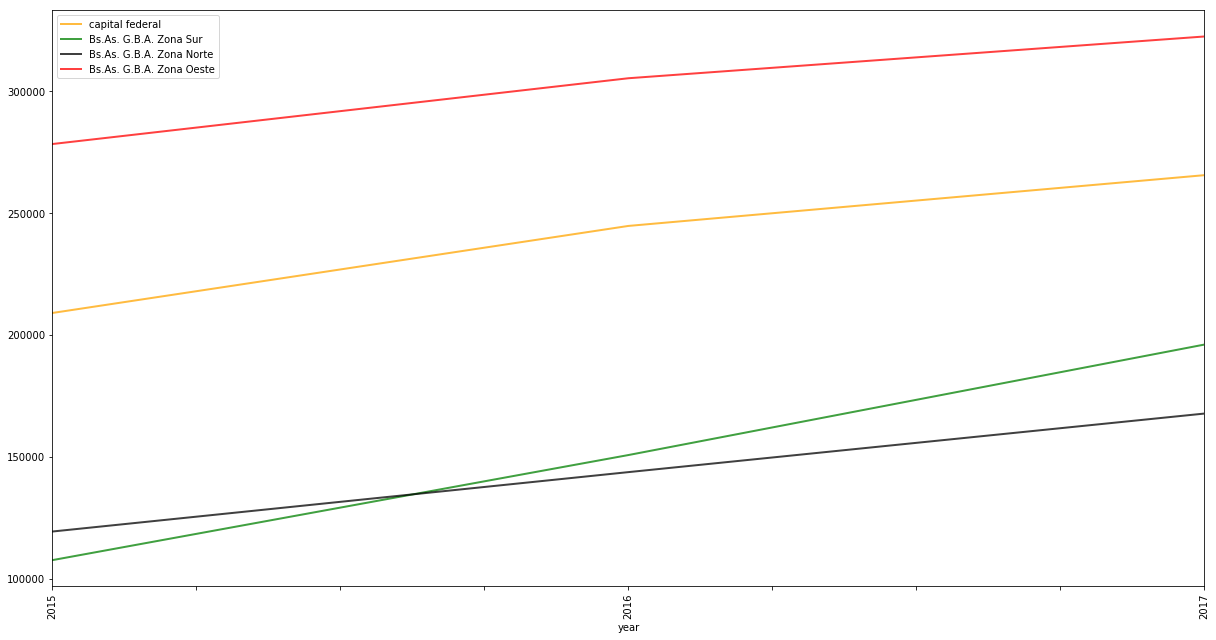

In [48]:
#vemos como vario el precio para cada distrito en el tiempo 
#por el precio total de la propiedad
%matplotlib inline

#fig = plt.figure(figsize=(10,4));
fig = plt.figure(figsize=(10,8));

ax = fig.add_axes([0,0,1,1]);

prop.loc[(prop['state_name']=='Capital Federal'),['price_aprox_usd','year']].groupby('year')\
                .mean().loc[:,'price_aprox_usd']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='capital federal',color='orange');        

prop.loc[(prop['state_name']=='Bs.As. G.B.A. Zona Sur'),['price_aprox_usd','year']].groupby('year')\
                .mean().loc[:,'price_aprox_usd']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='Bs.As. G.B.A. Zona Sur',color='green');        
prop.loc[(prop['state_name']=='Bs.As. G.B.A. Zona Oeste'),['price_aprox_usd','year']].groupby('year')\
                .mean().loc[:,'price_aprox_usd']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='Bs.As. G.B.A. Zona Norte',color='black');        
prop.loc[(prop['state_name']=='Bs.As. G.B.A. Zona Norte'),['price_aprox_usd','year']].groupby('year')\
                .mean().loc[:,'price_aprox_usd']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='Bs.As. G.B.A. Zona Oeste',color='red');        
                
ax.legend();


DataError: No numeric types to aggregate

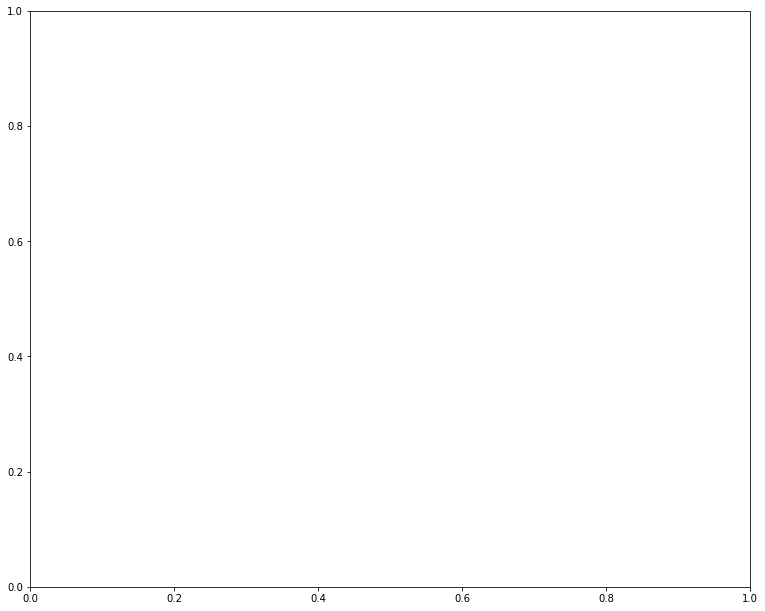

In [81]:
#vemos como vario el precio para cada distrito
%matplotlib inline

#fig = plt.figure(figsize=(10,4));
fig = plt.figure(figsize=(10,8));

edif = prop.dropna(subset=['price_usd_per_m2'])
ax = fig.add_axes([0,0,1,1]);
#c = a.property_type == 'house'
#d = a.place_name == 'San Isidro'
e = prop.surface_covered_in_m2<200

f = prop.surface_covered_in_m2>0
propiedades=prop[e&f]
propiedades.loc[(propiedades['state_name']=='Capital Federal'),['property_type','year']].groupby('year')\
                .mean().loc[:,'property_type']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='capital federal',color='orange');        

propiedades.loc[(propiedades['state_name']=='Bs.As. G.B.A. Zona Sur'),['property_type','year']].groupby('year')\
                .count().loc[:,'property_type']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='Bs.As. G.B.A. Zona Sur',color='green');        
propiedades.loc[(propiedades['state_name']=='Bs.As. G.B.A. Zona Oeste'),['property_type','year']].groupby('year')\
                .count().loc[:,'property_type']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='Bs.As. G.B.A. Zona Norte',color='black');        
propiedades.loc[(propiedades['state_name']=='Bs.As. G.B.A. Zona Norte'),['property_type','year']].groupby('year')\
                .count().loc[:,'property_type']\
                .plot(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='Bs.As. G.B.A. Zona Oeste',color='red');        
                
ax.legend();


In [ ]:
#precio promedio del total de propiedades   en zona norte de properati a travez de 2015 a 2017

prop[['year','price_aprox_usd']][prop['state_name']=="Bs.As. G.B.A. Zona Norte"].groupby('year').agg\
({'price_aprox_usd':'mean'}).plot.line(c='b',label="buenos aires y alrededores")

In [ ]:
#precio promedio del total de propiedades   en zona norte de properati a travez de 2015 a 2017

edif = prop.dropna(subset=['price_usd_per_m2'])
ax = fig.add_axes([0,0,1,1]);
plt.figure()
#c = a.property_type == 'house'
#d = a.place_name == 'San Isidro'
e = a.property_type == 'house'

#propiedades=prop[e&f]
propi = prop[e]
propi[['year','price_aprox_usd','rooms']][propi['state_name']=="Bs.As. G.B.A. Zona Norte"].groupby('year').agg\
({'rooms':'mean'}).plot.line(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='J.K.Rowling',title='Rating evolution through time')

propi[['year','price_aprox_usd','rooms']][propi['state_name']=="Bs.As. G.B.A. Zona Oeste"].groupby('year').agg\
({'rooms':'mean'}).plot.line(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='J.K.Rowling',title='Rating evolution through time')

propi[['year','price_aprox_usd','rooms']][propi['state_name']=="Bs.As. G.B.A. Zona Sur"].groupby('year').agg\
({'rooms':'mean'}).plot.line(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='J.K.Rowling',title='Rating evolution through time')

propi[['year','price_aprox_usd','rooms']][propi['state_name']=="Capital Federal"].groupby('year').agg\
({'rooms':'mean'}).plot.line(rot=90,linewidth=2,figsize=(16,8),alpha=0.75,label='J.K.Rowling',title='Rating evolution through time')

#ax.legend();

# Line plot showing the average ranking for the universities in USA and Switzerland from 2011-2016
plt.figure()
timesRanking.loc[timesRanking.country.str.contains('United States'),\
                 ['university_name','world_rank','year']].groupby('year').mean()\
                 .loc[:,'world_rank'].plot(rot=90,xticks=range(2011,2016), \
                 linewidth=2,figsize=(12,8),label='United States');
timesRanking.loc[timesRanking.country.str.contains('Switzerland'),\
                 ['university_name','world_rank','year']].groupby('year').mean()\
                 .loc[:,'world_rank'].plot(rot=90,xticks=range(2011,2016), \
                 linewidth=2,label='Switzerland');
plt.legend();

In [ ]:
prop[['place_name']][prop['state_name']=="Capital Federal"].groupby('place_name').agg({'place_name':'count'}).sort_values().[:16].plot(kind='bar')

In [ ]:
#precio promedio del total de departamentos por año en capital
x=prop['property_type']=="apartment"
y=prop['state_name']=="Capital Federal"

prop[['year','price_aprox_usd']][y&x].groupby('year').agg\
({'price_aprox_usd':'mean'}).plot.line(c='b',label="buenos aires y alrededores")

In [ ]:
#barrio que mas aumento por año
a = prop[['year','price_aprox_usd','place_name']].groupby(['year','place_name']).agg\
({'price_aprox_usd':'mean'}).sort_values(by='price_aprox_usd',ascending=False)

In [ ]:
a

In [ ]:
barrios_capital = prop[prop["state_name"] == "Capital Federal"]

In [ ]:

a = prop['lat-lon'].str.split(',', 3, expand=True) 
#ufos_fecha = ufos_fecha[0].str.split('/', 3, expand=True)
#ufos_fecha['cou'] = ufos['country']
a = prop.dropna(subset=['price_usd_per_m2'])

def _stringToInt(num):
    x,y = num.split(",")
    res = 10**len(y)*int(x)
    if res < 0:
        res = res - int(y)
    else:
        res = res + int(y)
    return res*(10**-len(y))

prop['lat'] = a.apply(lambda x: int(x[0]))
#prop['lon'] = a[1]
prop = prop.dropna(subset=['lat'])
prop.info()
#prop[s].plot(x = 'lat', y='price_aprox_usd', kind='bar',rot=90,figsize=(12,8), title='Top20 Book Titles',color='mediumspringgreen');

#proplatlon['price'] = prop['price_aprox_usd']
#prop.plot.scatter('lat','price_aprox_usd',alpha=1,s=80,marker='*',figsize=(12,10),color='magenta');


In [ ]:
prop.plot(x='price_aprox_usd',y ='lat', kind='line',rot=90,figsize=(12,8), title='distancia al rio',color='green');

In [76]:
#vemos que pasa con el precio segun las palabras en la descripcion
prop["description"] = prop["description"].str.lower()
a = prop.dropna(subset = ['description'])
b = a.description.str.contains("pileta") 
c = a.property_type == 'house'
d = a.place_name == 'San Isidro'
e = a.surface_covered_in_m2<200

f = a.surface_covered_in_m2>100
casas_pileta = a[b & c & d&e&f][['price_aprox_usd','place_name','surface_covered_in_m2']]
casas_pileta.groupby('place_name').agg({'price_aprox_usd':'mean'})


,Unnamed: 0,floor,geonames_id,price_aprox_usd,price_usd_per_m2,rooms,surface_covered_in_m2,surface_total_in_m2,a,longitud_desc
Unnamed: 0,1.000000,-0.002721,0.008337,-0.032763,-0.007046,-0.063006,-0.000343,-0.004698,-0.027655,-0.027655
floor,-0.002721,1.000000,-0.008883,0.058442,0.012059,-0.022105,0.021520,-0.002190,0.070655,0.070655
geonames_id,0.008337,-0.008883,1.000000,-0.020933,-0.001040,-0.017763,-0.002139,-0.009442,0.002548,0.002548
price_aprox_usd,-0.032763,0.058442,-0.020933,1.000000,0.030036,0.349040,0.073240,0.211114,0.128640,0.128640
price_usd_per_m2,-0.007046,0.012059,-0.001040,0.030036,1.000000,-0.002995,-0.002423,-0.007519,0.015234,0.015234
rooms,-0.063006,-0.022105,-0.017763,0.349040,-0.002995,1.000000,0.016310,0.100318,0.023077,0.023077
surface_covered_in_m2,-0.000343,0.021520,-0.002139,0.073240,-0.002423,0.016310,1.000000,0.245155,0.002070,0.002070
surface_total_in_m2,-0.004698,-0.002190,-0.009442,0.211114,-0.007519,0.100318,0.245155,1.000000,0.012865,0.012865
a,-0.027655,0.070655,0.002548,0.128640,0.015234,0.023077,0.002070,0.012865,1.000000,1.000000
longitud_desc,-0.027655,0.070655,0.002548,0.128640,0.015234,0.023077,0.002070,0.012865,1.000000,1.000000


In [70]:
data_esquinas_zona = []
zonas = ["Capital Federal", "Bs.As. G.B.A. Zona Norte", "Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Oeste"]
for zona in zonas: #Las 4 zonas que estudiamos
    info_zona = {}
    promedio_esquinas = prop[prop["state_name"] == zona]["price_aprox_usd"].mean()
    promedio_entre_esquinas = prop[prop["state_name"] == zona]["price_aprox_usd"].mean()
    info_zona["state_name"] = zona
    info_zona["Precio promedio esquinas"] = promedio_esquinas
    info_zona["Precio promedio entre esquinas"] = promedio_entre_esquinas
    data_esquinas_zona.append(info_zona)

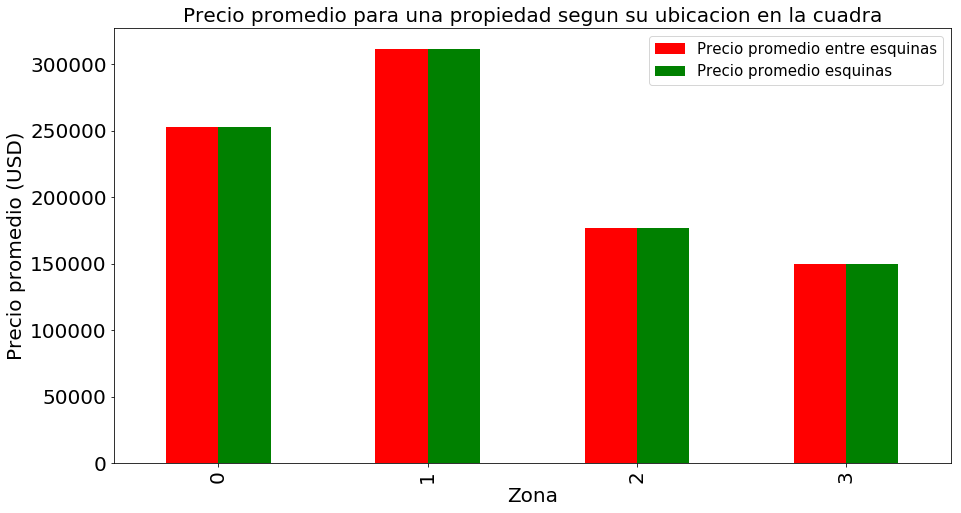

In [74]:
esquinas = pd.DataFrame(data_esquinas_zona)
esquinas


ax = esquinas.plot(kind = "bar", color =["r","g"] ,fontsize=20,figsize = (15,8))
ax.set_xlabel("Zona", fontsize=20)
ax.set_ylabel("Precio promedio (USD)", fontsize=20)
ax.set_title('Precio promedio para una propiedad segun su ubicacion en la cuadra', fontsize = 20)
ax.legend(fontsize = 15)

